In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import timedelta

In [21]:
df=pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv',header=0,names=['Date','Production'])

In [22]:
df.head()

,Date,Production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [24]:
df['Date']=pd.to_datetime(df.Date)

In [25]:
df.set_index('Date',inplace=True)

In [26]:
df.head()

,Production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [28]:
startdate=pd.to_datetime('2010-01-01')
df=df[startdate:]

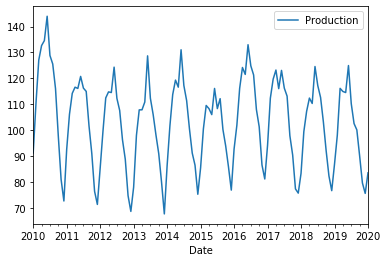

In [30]:
df.plot()

# ACF

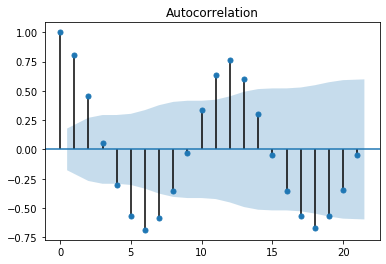

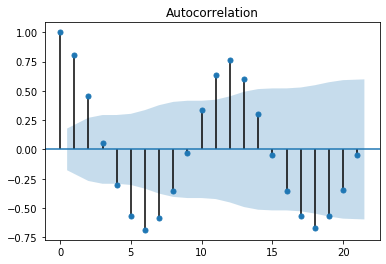

In [47]:
plot_acf(df)

# Based on decaying ACF, we are likely dealing with an Auto Regressive process

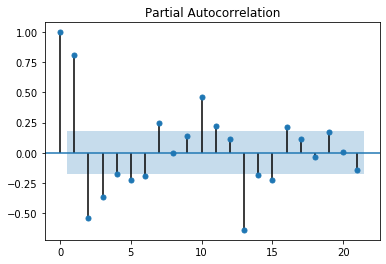

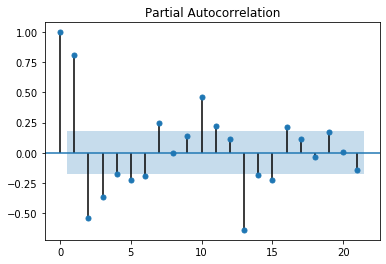

In [39]:
plot_pacf(df)
#AR values 1,2,3

# Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

##  on stock data

In [59]:
import yfinance as fy

In [66]:
tikername='SPY'

In [67]:
tikerdata=fy.Ticker(tikername)

In [77]:
tikerDF=tikerdata.history(period='1d',start='2010-1-1', end='2020-3-20')
tikerDF=tikerDF[['Close']]

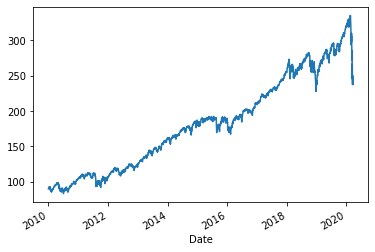

In [78]:
tikerDF.Close.plot()

In [79]:
tikerDF['FirstDifference']=tikerDF['Close']-tikerDF['Close'].shift(1)

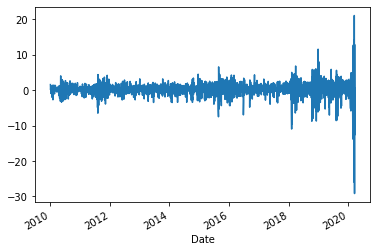

In [80]:
tikerDF['FirstDifference'].plot()

In [82]:
tikerDF

,Close,FirstDifference
Date,,
2009-12-31,90.31,NaN
2010-01-04,91.84,1.53
2010-01-05,92.08,0.24
2010-01-06,92.15,0.07
2010-01-07,92.54,0.39
...,...,...
2020-03-13,266.57,20.99
2020-03-16,237.40,-29.17
2020-03-17,250.22,12.82


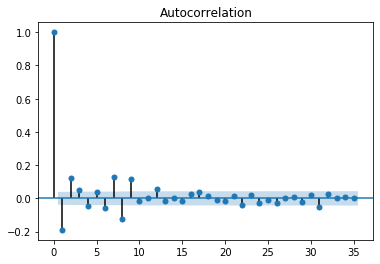

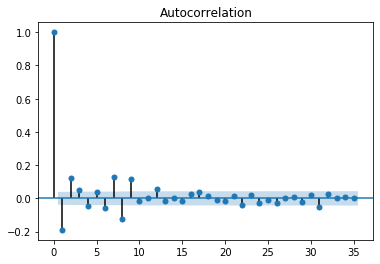

In [83]:
plot_acf(tikerDF['FirstDifference'].dropna())


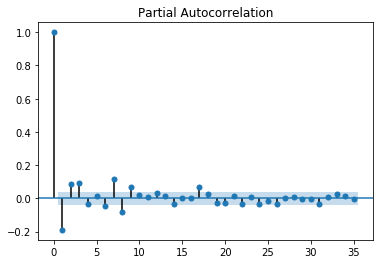

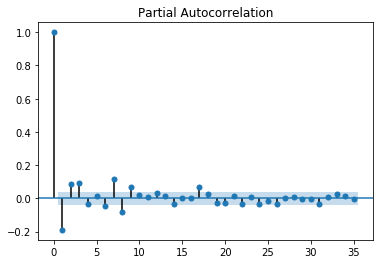

In [85]:
plot_pacf(tikerDF['FirstDifference'].dropna())